<a href="https://colab.research.google.com/github/mudrap17/Data-Mining-Assignment/blob/main/Assignment_2_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class NaiveBayesClassifier:
    
    def __init__(self, X, y):
        
        '''
        X and y denotes the features and the target labels respectively
        '''
        self.X, self.y = X, y 
        
        self.N = len(self.X) # Length of the training set

        self.dim = len(self.X[0]) # Dimension of the vector of features

        self.attrs = [[] for _ in range(self.dim)] # Here we'll store the columns of the training set

        self.output_dom = {} # Output classes with the number of ocurrences in the training set. In this case we have only 2 classes

        self.data = [] # To store every row [Xi, yi]
        
        
        for i in range(len(self.X)):
            for j in range(self.dim):
                # if we have never seen this value for this attr before, 
                # then we add it to the attrs array in the corresponding position
                if not self.X[i][j] in self.attrs[j]:
                    self.attrs[j].append(self.X[i][j])
                    
            # if we have never seen this output class before,
            # then we add it to the output_dom and count one occurrence for now
            if not self.y[i] in self.output_dom.keys():
                self.output_dom[self.y[i]] = 1
            # otherwise, we increment the occurrence of this output in the training set by 1
            else:
                self.output_dom[self.y[i]] += 1
            # store the row
            self.data.append([self.X[i], self.y[i]])
            
            

    def classify(self, entry):

        solve = None # Final result
        max_arg = -1 # partial maximum

        for y in self.output_dom.keys():

            prob = self.output_dom[y]/self.N # P(y)

            for i in range(self.dim):
                cases = [x for x in self.data if x[0][i] == entry[i] and x[1] == y] # all rows with Xi = xi
                n = len(cases)
                prob *= n/self.N # P *= P(Xi = xi)
                
            # if we have a greater prob for this output than the partial maximum...
            if prob > max_arg:
                max_arg = prob
                solve = y

        return solve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv('./train_data.csv')
data.head()

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.shape)

(60115, 4)


In [ ]:
data.isnull().sum()

Unnamed: 0         0
Sentence_id        0
New_Sentence    1113
Type               0
dtype: int64

In [ ]:
data["Type"].value_counts()

Responsibility    15561
Requirement       14132
SoftSkill          9581
Experience         9248
Skill              6956
Education          4637
Name: Type, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X,y=data.drop(['Type'], axis=1),data["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
data2=data.dropna()

In [ ]:
data2.head()

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill


In [ ]:
data2.isnull().sum()

Unnamed: 0      0
Sentence_id     0
New_Sentence    0
Type            0
dtype: int64

In [ ]:
print(data2.shape)

(59002, 4)


In [51]:
count_type=data2["Type"].value_counts()
print(count_type)

Responsibility    15257
Requirement       13878
SoftSkill          9416
Experience         9078
Skill              6833
Education          4540
Name: Type, dtype: int64


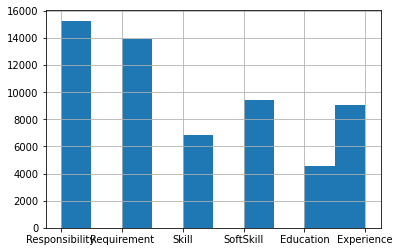

In [ ]:
data2["Type"].hist()

In [ ]:
vocab={} #no. of times the word occurs in all data
word_count={} #no. of sentences the word occurs in

for index,row in data2.iterrows():
    words=row["New_Sentence"].split(" ")
    flag=dict.fromkeys(words,0)
    for w in words:
        if w not in vocab.keys():
            vocab[w]=1
        else:
            vocab[w]+=1
        if w not in word_count.keys():
            word_count[w]=1
            flag[w]=1
        elif flag[w]==0:
            word_count[w]+=1
            flag[w]=1

In [ ]:
print(vocab)

{'Author': 4, 'and/or': 958, 'Review': 153, 'architecture/design': 4, 'and': 39661, 'other': 1178, 'technical': 2106, 'documents': 98, 'ensuring': 180, 'high': 569, 'quality': 678, 'deliverables': 95, 'systems': 939, 'development': 2069, 'across': 891, 'tech': 23, 'stacks': 6, '': 58947, 'applications': 427, 'teams.': 401, 'Should': 570, 'be': 2544, 'able': 805, 'to': 19057, 'develop': 661, 'custom': 69, 'dynamic': 121, 'shape,': 1, 'object': 13, 'script': 14, 'validation': 87, 'testing': 609, 'with': 12019, 'database.': 18, 'Experience': 3657, 'in': 18856, 'working': 1920, 'crosslly': 1, 'a': 9192, 'larger': 33, 'Engineering': 1413, 'Organization': 31, 'multiple': 849, 'sites': 69, 'highly': 436, 'desired.': 97, 'Previous': 167, 'business': 3068, 'experience,': 264, 'including': 1467, 'but': 198, 'not': 227, 'limited': 124, 'management,': 487, 'engineering,': 251, 'sales,': 92, 'operations,': 95, 'finance,': 51, 'contracts,': 12, 'customer': 1830, 'support.': 128, 'Delivering': 8, 'fa

In [ ]:
print(word_count)

{'Author': 4, 'and/or': 939, 'Review': 149, 'architecture/design': 4, 'and': 27628, 'other': 1157, 'technical': 1968, 'documents': 98, 'ensuring': 179, 'high': 547, 'quality': 645, 'deliverables': 95, 'systems': 907, 'development': 1972, 'across': 878, 'tech': 22, 'stacks': 6, '': 57817, 'applications': 418, 'teams.': 401, 'Should': 557, 'be': 2409, 'able': 793, 'to': 15257, 'develop': 645, 'custom': 62, 'dynamic': 120, 'shape,': 1, 'object': 13, 'script': 14, 'validation': 85, 'testing': 566, 'with': 11078, 'database.': 18, 'Experience': 3591, 'in': 16884, 'working': 1879, 'crosslly': 1, 'a': 8188, 'larger': 33, 'Engineering': 1326, 'Organization': 31, 'multiple': 830, 'sites': 68, 'highly': 432, 'desired.': 97, 'Previous': 166, 'business': 2799, 'experience,': 253, 'including': 1442, 'but': 196, 'not': 225, 'limited': 124, 'management,': 445, 'engineering,': 241, 'sales,': 89, 'operations,': 95, 'finance,': 50, 'contracts,': 12, 'customer': 1655, 'support.': 128, 'Delivering': 8, 'fa

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

for key,value in dict(vocab).items():
    if value<=5 or key in stop_words:
        del vocab[key]


print(len(vocab.keys()))
print(vocab)

8475
{'and/or': 958, 'Review': 153, 'technical': 2106, 'documents': 98, 'ensuring': 180, 'high': 569, 'quality': 678, 'deliverables': 95, 'systems': 939, 'development': 2069, 'across': 891, 'tech': 23, 'stacks': 6, '': 58947, 'applications': 427, 'teams.': 401, 'Should': 570, 'able': 805, 'develop': 661, 'custom': 69, 'dynamic': 121, 'object': 13, 'script': 14, 'validation': 87, 'testing': 609, 'database.': 18, 'Experience': 3657, 'working': 1920, 'larger': 33, 'Engineering': 1413, 'Organization': 31, 'multiple': 849, 'sites': 69, 'highly': 436, 'desired.': 97, 'Previous': 167, 'business': 3068, 'experience,': 264, 'including': 1467, 'limited': 124, 'management,': 487, 'engineering,': 251, 'sales,': 92, 'operations,': 95, 'finance,': 51, 'contracts,': 12, 'customer': 1830, 'support.': 128, 'Delivering': 8, 'fast': 113, 'right': 113, 'first': 32, 'time.': 102, 'Track': 61, 'department': 62, 'capital': 84, 'budget': 89, '.': 6133, 'Meet': 23, 'performance': 577, 'metrics.': 42, 'YOU': 65

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [52]:
categories=data2.Type.unique()
from collections import defaultdict
W=np.zeros((len(vocab.keys()),len(categories)))
wc_type=pd.DataFrame(data=W,index=vocab.keys(),columns=categories)

#wc_type=dict.fromkeys(vocab.keys(),{})
#wc_type={}
for index,row in data2.iterrows():
    words=set(row["New_Sentence"].split(" "))
    for w in words:
      if w in wc_type.index:
        wc_type.loc[w][row["Type"]]+=1

print(wc_type)

              Responsibility  Requirement  Skill  SoftSkill  Education  \
and/or                 171.0        176.0  116.0       20.0       95.0   
Review                 136.0          5.0    1.0        3.0        2.0   
technical              747.0        414.0  121.0      186.0      187.0   
documents               72.0         15.0    4.0        4.0        0.0   
ensuring               151.0         10.0    3.0       10.0        0.0   
...                      ...          ...    ...        ...        ...   
contributors             3.0          2.0    0.0        2.0        0.0   
Glide                    0.0          0.0    1.0        0.0        0.0   
Events                   4.0          1.0    0.0        1.0        0.0   
Marine                   3.0          1.0    2.0        0.0        0.0   
ressources               2.0          1.0    0.0        3.0        0.0   

              Experience  
and/or             361.0  
Review               2.0  
technical          313.0  
doc

In [53]:
laplace_wc_type=wc_type.copy()
#print(laplace_wc_type)

for c in categories:
  wc_type[c]=wc_type[c]/count_type[c]

print(wc_type)

              Responsibility  Requirement  Skill  SoftSkill  Education  \
and/or                 171.0        176.0  116.0       20.0       95.0   
Review                 136.0          5.0    1.0        3.0        2.0   
technical              747.0        414.0  121.0      186.0      187.0   
documents               72.0         15.0    4.0        4.0        0.0   
ensuring               151.0         10.0    3.0       10.0        0.0   
...                      ...          ...    ...        ...        ...   
contributors             3.0          2.0    0.0        2.0        0.0   
Glide                    0.0          0.0    1.0        0.0        0.0   
Events                   4.0          1.0    0.0        1.0        0.0   
Marine                   3.0          1.0    2.0        0.0        0.0   
ressources               2.0          1.0    0.0        3.0        0.0   

              Experience  
and/or             361.0  
Review               2.0  
technical          313.0  
doc

In [59]:
import math

vocab_size=len(vocab.keys())
def laplace_smoothing(laplace_wc_type,alpha=1):
  for w in vocab.keys():
    for c in categories:
      laplace_wc_type.loc[w][c]=math.log((laplace_wc_type.loc[w][c]+alpha)/(count_type[c]+alpha*vocab_size))

laplace_smoothing(laplace_wc_type)
print(laplace_wc_type)

              Responsibility  Requirement     Skill  SoftSkill  Education  \
and/or             -4.927085    -4.838566 -4.873957  -6.747531  -4.909510   
Review             -5.154599    -8.222956 -8.942984  -8.405759  -8.375246   
technical          -3.457177    -3.986437 -4.832110  -4.560944  -4.237416   
documents          -5.784120    -7.242127 -8.026693  -8.182615  -9.473858   
ensuring           -5.050699    -7.616821 -8.249836  -7.394158  -9.473858   
...                      ...          ...       ...        ...        ...   
contributors       -8.688285    -8.916104 -9.636131  -8.693441  -9.473858   
Glide             -10.074580   -10.014716 -8.942984  -9.792053  -9.473858   
Events             -8.465142    -9.321569 -9.636131  -9.098906  -9.473858   
Marine             -8.688285    -9.321569 -8.537519  -9.792053  -9.473858   
ressources         -8.975967    -9.321569 -9.636131  -8.405759  -9.473858   

              Experience  
and/or         -3.881336  
Review         -8.674

In [60]:
log_label_priors={}
for c in categories:
  log_label_priors[c]=count_type[c]/len(data2.index)

def predict(count_type, vocab, laplace_wc_type, log_label_priors, categories, test_sentences):
    result = []
    for text in test_sentences:
        label_scores = {c: log_label_priors[c] for c in categories}
        words = set(text.split(" "))
        for word in words:
            if word not in vocab: continue
            for c in categories:
                log_w_given_c = laplace_smoothing(count_type, vocab, laplace_wc_type, word, c)
                label_scores[c] += log_w_given_c
        result.append(max(label_scores, key=label_scores.get))
    return result

In [61]:
def laplace_smoothing(count_type, vocab, laplace_wc_type, word, sent_class):
    a = laplace_wc_type[word][sent_class] + 1
    b = count_type[sent_class] + len(vocab)
    return math.log(a/b)